In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
sns.set()
import math

In [2]:
#import data
data = pd.read_csv('train_test-7.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  805 non-null    int64  
 1   profile pic                 805 non-null    int64  
 2   nums/length username        805 non-null    float64
 3   fullname words              805 non-null    int64  
 4   nums/length fullname        805 non-null    float64
 5   name==username              805 non-null    int64  
 6   description length          805 non-null    int64  
 7   external URL                805 non-null    int64  
 8   private                     805 non-null    int64  
 9   #posts                      805 non-null    int64  
 10  #followers                  805 non-null    int64  
 11  #follows                    805 non-null    int64  
 12  fake                        805 non-null    int64  
 13  followers_to_follows_ratio  805 non

In [3]:
columns=data.columns
fake = data['fake'] 
data.drop(columns= ['fake', 'Unnamed: 0'], inplace=True)
columns=data.columns

In [4]:
data.head(3)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,followers_to_follows_ratio
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,1.047120
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,5.140713
2,1,0.10,2,0.0,0,0,0,1,13,159,98,1.622449


# PCA

https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

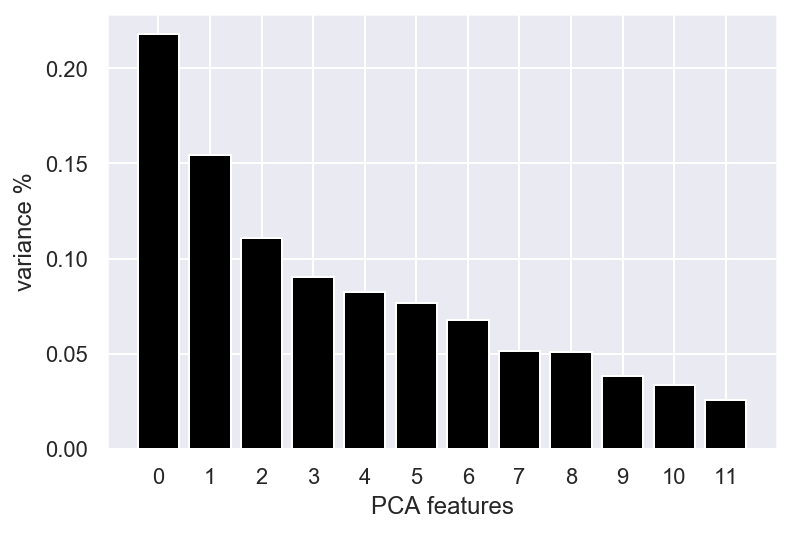

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
"""# Load in the data
df = pd.read_csv('2013_2014_cleaned.csv')"""
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(data)
# Create a PCA instance: pca
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [6]:
pca_data=PCA_components.iloc[:,:1]

# data visualization

In [7]:
#pca_data.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 'PC11', 'PC12', 'PC13','PC14', 'PC15','PC16','PC17']
pca_data.columns=['PC1']

Iris Dataset Visualization and Machine Learning

https://www.kaggle.com/xuhewen/iris-dataset-visualization-and-machine-learning

Text(0.5, 1.0, 'D2')

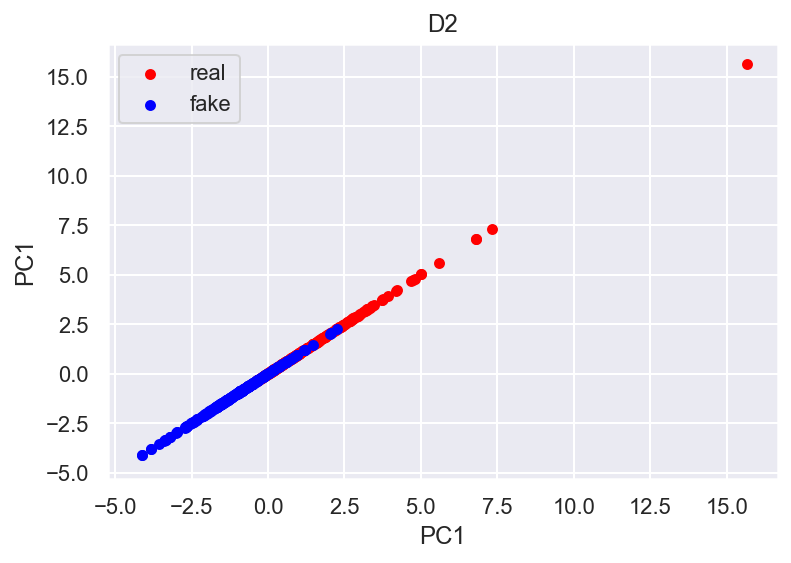

In [8]:
ax = pca_data[fake==0].plot.scatter(x='PC1', y='PC1', color='red', label='real')
pca_data[fake==1].plot.scatter(x='PC1', y='PC1', color='blue', label='fake', ax=ax)
ax.set_title("D2")

# Implementing Agglomerative Clustering Clustering in Python

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [9]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2).fit(pca_data)
pred = clustering.labels_

In [10]:
labels_true=fake
labels_pred=pred
labels = pred
X=pca_data
y=fake

In [11]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(labels_true, labels_pred)

array([[392,  15],
       [ 79, 319]])

In [12]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

print("Adjusted Rand index:", 
      metrics.adjusted_rand_score(labels_true, labels_pred))
print("Mutual Information based scores:", 
      metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Homogeneity:", 
      metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness:", 
      metrics.completeness_score(labels_true, labels_pred))
print("V-measure:",
      metrics.v_measure_score(labels_true, labels_pred))
print("Fowlkes-Mallows scores:",
      metrics.fowlkes_mallows_score(labels_true, labels_pred))

print("Silhouette Coefficient:",
      metrics.silhouette_score(X, labels, metric='euclidean'))

Adjusted Rand index: 0.5869600755064047
Mutual Information based scores: 0.5134348775354028
Homogeneity: 0.5085047225175545
Completeness: 0.5193627420446716
V-measure: 0.5138763821887539
Fowlkes-Mallows scores: 0.7962689151817708
Silhouette Coefficient: 0.5165987536064267


Functions to Plot KMeans, Hierarchical and DBSCAN Clustering

https://medium.com/@plog397/functions-to-plot-kmeans-hierarchical-and-dbscan-clustering-c4146ed69744

Text(0.5, 1.0, 'Agglomerative Clustering-D2')

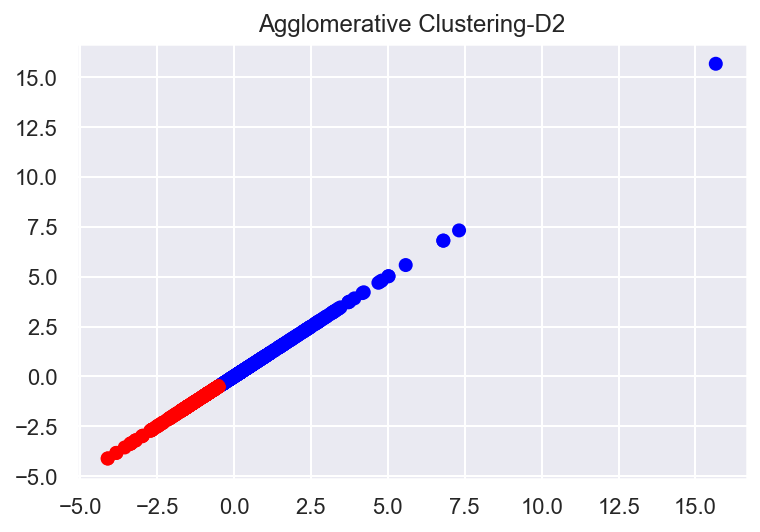

In [13]:
plt.scatter(x=pca_data.PC1, y=pca_data.PC1,c=pred, cmap='bwr')
plt.title("Agglomerative Clustering-D2")